## Basic Libraries Used

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree
import re
from datetime import datetime
import re
from datetime import datetime

!pip install tensorflow
!pip install keras
#Import the libraries
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
sb.set() # set the default Seaborn style for graphics

In [2]:
# Function nto read the Description of data to automatically detect a different year so that manual slicing is not required
def year_checker(x):
    if ('2021' in x):
        return 22
    if ('2020' in x):
        return 21
    if ('2019' in x):
        return 20
    if ('2018' in x):
        return 19
    if ('2017' in x):
        return 18
    if ('2016' in x):
        return 17
    if ('2015' in x):
        return 16
    if ('2014' in x):
        return 15
    if ('2013' in x):
        return 14
    if ('2012' in x):
        return 13
    if ('2011' in x):
        return 12
    if ('2010' in x):
        return 11
    if ('2009' in x):
        return 10
    if ('2008' in x):
        return 9
    if ('2007' in x):
        return 8
    if ('2006' in x):
        return 7
    if ('2005' in x):
        return 6
    if ('2004' in x):
        return 5
    if ('2003' in x):
        return 4
    if ('2002' in x):
        return 3
    if ('2001' in x):
        return 2
    if ('2000' in x):
        return 1

## Using price indicators to predict future prices using LSTM model

### Extracting data from the Apple csv file, for the daily Date, High, Low, Open, Close, Volume, and Adjusted Close prices of Apple stock market

In [3]:
#Read the data from the APPLE csv file privided
#Tabulated in form of the columns of - Data, High, Low, Open, Close, Volume, Adjusted Close. 
df = pd.read_csv('APPLE.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,01-11-1999,80.69,77.37,80.00,77.620,2487300,0.596879
1,02-11-1999,81.69,77.31,78.00,80.250,3564600,0.617103
2,03-11-1999,83.25,81.00,81.62,81.500,2932700,0.626715
3,04-11-1999,85.37,80.62,82.06,83.620,3384700,0.643017
4,05-11-1999,88.37,84.00,84.62,88.310,3721500,0.679082
...,...,...,...,...,...,...,...
5391,07-04-2021,127.92,125.14,125.83,127.900,83466716,127.900000
5392,08-04-2021,130.39,128.52,128.95,130.360,88844591,130.360000
5393,09-04-2021,133.04,129.47,129.80,132.995,106686703,132.995000
5394,12-04-2021,132.85,130.63,132.52,131.240,91419983,131.240000


In [4]:
#Find the number of rows and columns in the dataframe
df.shape

(5396, 7)

## Visualize the closing price history 

Text(0, 0.5, 'Adj Close Price USD ($)')

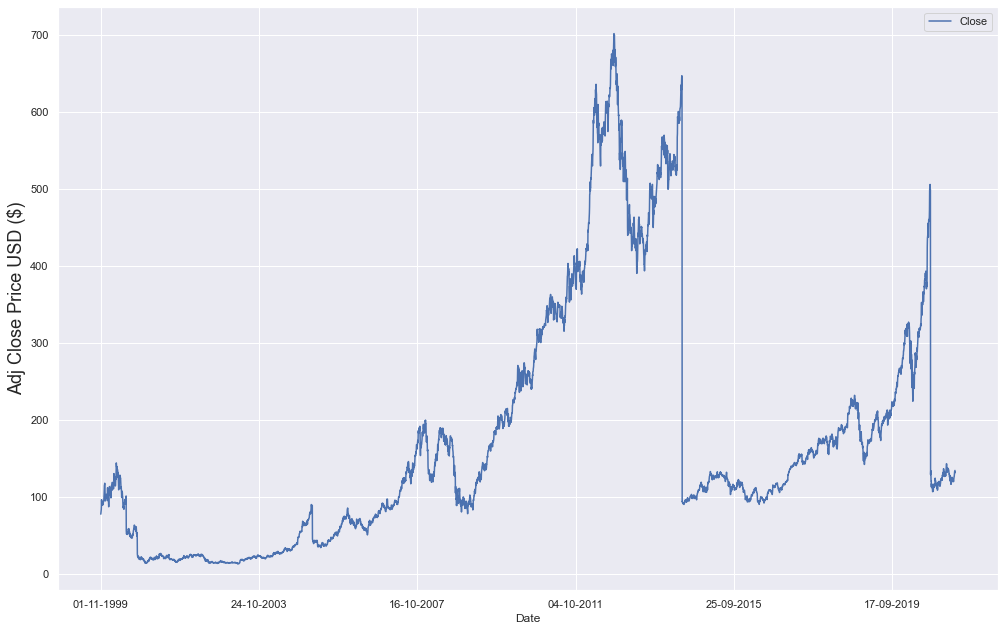

In [5]:
# Plot a time series graph between Data and the Closing Price of each day for about 20 year
df.plot(x="Date", y="Close", figsize=(15, 10))
plt.ylabel('Close Price USD ($)', fontsize = 18)

In [6]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array 
dataset=data.values
#To get the number of rows to train the model on 
#We want to train our data on 80% of the data
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

4317

## Scale the data using MinMaxScaler object

In [7]:
#Scale the data using the MinMaxScaler object
#Get the data all between 0 and 1
#Helps our LSTM model for more accurate predictions 
scaler = MinMaxScaler(feature_range=(0,1))
#Computes the minimum and maximum values to be used
#for scaling and then transforms the data based on these
#two values with 0 and 1 inclusive
scaled_data = scaler.fit_transform(dataset)


#Print the scaled data
scaled_data

array([[0.09361665],
       [0.09743389],
       [0.09924816],
       ...,
       [0.17398909],
       [0.17144184],
       [0.17607187]])

In [8]:
#Create the training dataset
#Create the scaled training dataset
#Rows from 0 to training_data_length which is also 80% of the 
#total data and we use all the columns
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    #append the past 60 values to our x_training dataset
    x_train.append(train_data[i-60:i, 0])
    #y_train will contain the 61st value at position 60
    y_train.append(train_data[i, 0])
    
    

In [9]:
#Conver the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the x_train data set
#LSTM expects the data to be 3 dimensional and the form of number
# of number of samples, number of time steps, number of features 
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(4257, 60, 1)

## Building the LSTM model

In [11]:
#Build the LSTM model
#LSTM is able to store past information that is important and forget the information that is not important 
model=Sequential()
#Add the LSTM layer with 50 neurons, and then we add another layer
#Since it is the very first layer, we give it a shape which is no.
#of time steps 60 and no. of features whcih is 1
model.add(LSTM(50,return_sequences=True, input_shape = (60,1)))
#Another layer which has 50 neurons
#False return sequence 'cause we are not adding any more LSTM layers 
#to our model
model.add(LSTM(50, return_sequences=False))
#Dense layer with 25 neurons
model.add(Dense(25))
#Dense layer with 1 neuron
model.add(Dense(1))

### Compile and Train the LSTM model 

In [12]:
#Compile the model
#optimizer is used to improve upon the loss function
#loss function is used to measure how well the model did 
#on the data training 
model.compile(optimizer='adam',loss='mean_squared_error')

In [13]:
#Train the model
#fit is another name for train
#batch size is total number of training samples present in a single batch
#epoch is the number of iterations when an entire dataset
#is passed forward and backward through a neuro network
model.fit(x_train, y_train, batch_size=1, epochs=1)

4257/4257 [==============================] - 50s 11ms/step - loss: 0.0029


## Creating the testing dataset

In [14]:
#Create the testing dataset
#Create a new array containing scaled values from 4257
test_data = scaled_data[training_data_len - 60: ,:]
#Lets create the data sets x_test and y_test
x_test = []
#all of the values that we want our model to predict
#These are the actual test values 61st values
#These are not scaled
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    #append last 60 values to x_test data set
    x_test.append(test_data[i-60:i, 0])

In [15]:
#Convert the data to a numpy array
x_test = np.array(x_test)
#now we can use it in the LSTM valuse

In [16]:
#Reshape the x_test data set
#LSTM expects the data to be 3 dimensional and the form of number
# of number of samples, number of time steps, number of features 
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))
x_test.shape

(1079, 60, 1)

## Get the models predicted values

In [17]:
#Get the models predicted values
predictions = model.predict(x_test)
#We want it to be exactly the same as y_test dataset 
#once we inverse transform this data
predictions = scaler.inverse_transform(predictions)
#What we are doing is we are unscaling the values 
#and now we want predictions to contain the same values
#as y_test dataset contains


## Evaluate the model using the Root Mean Square

In [18]:
#Evaluate the model
#Find the root mean squared error (RMSE)
#Standard deviation of residuals and a good measure
#of how accurate the model predicts the response
rmse = np.sqrt( np.mean( predictions - y_test)**2 )
rmse

0.33989162117792066

## Visualize the model with closed price over the training dataset, and also the closeness of the actual values and Predictions over the test dataset

<ipython-input-19-56eeec92b19c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


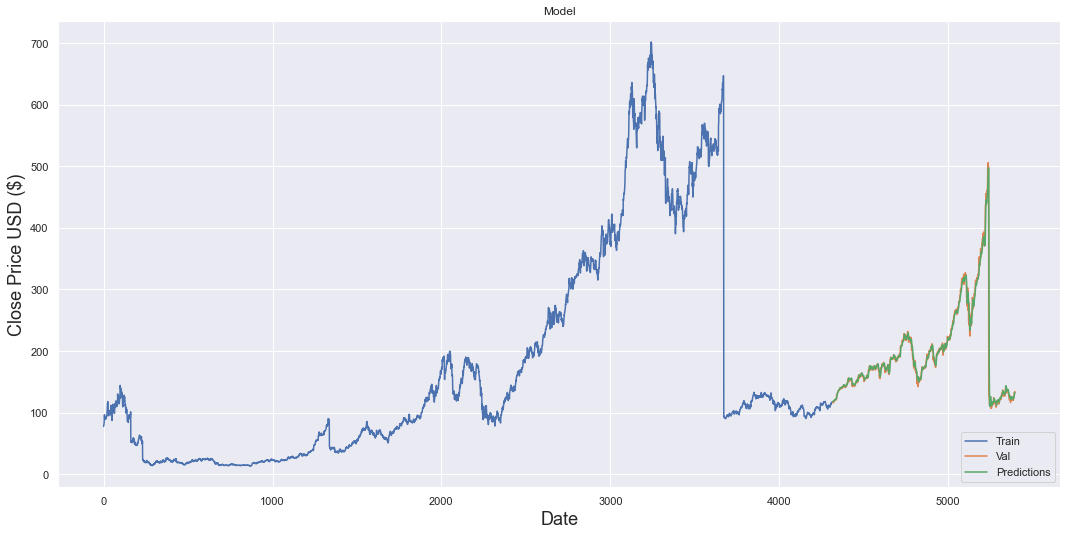

In [19]:
#Plot the data
#data from 0 to the length of training data
train = data[:training_data_len]
#from the length of training data to end
valid = data[training_data_len:]
valid['Predictions'] = predictions


#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [20]:
#Show the valid and predicted prices
valid

,Close,Predictions
4317,116.760,118.260864
4318,116.730,118.300186
4319,115.820,118.292038
4320,116.150,118.015060
4321,116.020,117.820000
...,...,...
5391,127.900,126.112442
5392,130.360,127.560631
5393,132.995,129.302261
5394,131.240,131.386154


In [21]:
#Try to predict the closing price for apple stock for 
#14th April 2021
#get the code
apple_quote = pd.read_csv('APPLE.csv')
#Create a new data frame
#I want only the closed column
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the
#dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values bw 0 and 1
#I'm not using fit but scaler cause i want to transform using min max only
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to numpy array
X_test = np.array(X_test)
#Reshape the data to be 3D

X_test = np.reshape(X_test, (X_test.shape[0],x_test.shape[1], 1))
#number of samples, number of time steps, number of features

#Get the predicted price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[133.77245]]


## Determining accuracy of adapted strategy from Jack's Buy and Hope book and determining which moving average (simple, exponential or weighted) makes the strategy most profitable

In [22]:
#Read data from Apple daily closing price data.
csv_data = pd.read_csv('AAPL.csv',header = None)
closeprice= []
for i in range(9,43021,8):
    b = csv_data.iloc[:,i]
    closeprice.append(b)
#Make new List to dataframe
closeprice = pd.DataFrame(closeprice)
#Clean the Data to extract only necessary columns
closeprice = closeprice[0:5317]
#Reverse the Data to chronological order(based on year)
closeprice = closeprice.iloc[::-1]
closeprice = closeprice.reset_index()
#Rename columns for easy visualisation of data
closeprice.columns = ['Index','Description', 'Value']
closeprice = closeprice.drop(['Index'], axis=1)
closeprice

,Description,Value
0,Time Series (Daily)/2000-01-27/5. adjusted close,0.84587299239
1,Time Series (Daily)/2000-01-28/5. adjusted close,0.781432849878
2,Time Series (Daily)/2000-01-31/5. adjusted close,0.797812026913
3,Time Series (Daily)/2000-02-01/5. adjusted close,0.770897886246
4,Time Series (Daily)/2000-02-02/5. adjusted close,0.7598246398
...,...,...
5312,Time Series (Daily)/2021-03-10/5. adjusted close,119.98
5313,Time Series (Daily)/2021-03-11/5. adjusted close,121.96
5314,Time Series (Daily)/2021-03-12/5. adjusted close,121.03
5315,Time Series (Daily)/2021-03-15/5. adjusted close,123.99


### Read Daily SMAPrice of AAPL Stocks

In [23]:
#Read data from Apple daily Simple Moving Average data.
SMA = pd.read_csv('sma.csv',header = None)
SMALIST= []
for i in range(7,5375,1):
    b = SMA.iloc[:,i]
    SMALIST.append(b)
#Make new List to dataframe
SMALIST = pd.DataFrame(SMALIST)
#Clean the Data to extract only necessary columns
SMALIST = SMALIST[0:5317]
#Reverse the Data to chronological order(based on year)
SMALIST = SMALIST.iloc[::-1]
SMALIST = SMALIST.reset_index()
#Rename columns for easy visualisation of data
SMALIST.columns = ['Index','Description', 'Value']
SMALIST = SMALIST.drop(['Index'], axis=1)
SMALIST

,Description,Value
0,Technical Analysis: SMA/2000-01-27/SMA,0.8175
1,Technical Analysis: SMA/2000-01-28/SMA,0.8280
2,Technical Analysis: SMA/2000-01-31/SMA,0.8288
3,Technical Analysis: SMA/2000-02-01/SMA,0.8311
4,Technical Analysis: SMA/2000-02-02/SMA,0.8274
...,...,...
5312,Technical Analysis: SMA/2021-03-10/SMA,122.8620
5313,Technical Analysis: SMA/2021-03-11/SMA,122.6480
5314,Technical Analysis: SMA/2021-03-12/SMA,122.4290
5315,Technical Analysis: SMA/2021-03-15/SMA,122.1950


### Read Daily EMAPrice of AAPL Stocks

In [24]:
#Read data from Apple daily Exponential Moving Average data.
EMA = pd.read_csv('EMA.csv',header = None)
EMALIST= []
for i in range(7,5375,1):
    temp2 = EMA.iloc[:,i]
    EMALIST.append(temp2)
#Make new List to dataframe
EMALIST = pd.DataFrame(EMALIST)
#Clean the Data to extract only necessary columns
EMALIST = EMALIST[0:5317]
#Reverse the Data to chronological order(based on year)
EMALIST = EMALIST.iloc[::-1]
EMALIST = EMALIST.reset_index()
#Rename columns for easy visualisation of data
EMALIST.columns = ['Index','Description', 'Value']
EMALIST= EMALIST.drop(['Index'], axis=1)
EMALIST


,Description,Value
0,Technical Analysis: EMA/2000-01-27/EMA,0.8221
1,Technical Analysis: EMA/2000-01-28/EMA,0.8239
2,Technical Analysis: EMA/2000-01-31/EMA,0.8153
3,Technical Analysis: EMA/2000-02-01/EMA,0.8125
4,Technical Analysis: EMA/2000-02-02/EMA,0.8056
...,...,...
5312,Technical Analysis: EMA/2021-03-10/EMA,123.0012
5313,Technical Analysis: EMA/2021-03-11/EMA,122.9174
5314,Technical Analysis: EMA/2021-03-12/EMA,122.4597
5315,Technical Analysis: EMA/2021-03-15/EMA,122.2688


### Read Daily WMAPrice of AAPL Stocks

In [25]:
#Read data from Apple daily Weighted Moving Average data.
WMA = pd.read_csv('WMA.csv',header = None)
WMALIST= []
for i in range(7,5375,1):
    temp2 = WMA.iloc[:,i]
    WMALIST.append(temp2)
#Make new List to dataframe
WMALIST = pd.DataFrame(WMALIST)
#Clean the Data to extract only necessary columns
WMALIST = WMALIST[17:5334]
#Reverse the Data to chronological order(based on year)
WMALIST = WMALIST.iloc[::-1]
WMALIST = WMALIST.reset_index()
#Rename columns for easy visualisation of data
WMALIST.columns = ['Index','Description', 'Value']
WMALIST= WMALIST.drop(['Index'], axis=1)
WMALIST

,Description,Value
0,Technical Analysis: WMA/2000-01-27/WMA,0.8333
1,Technical Analysis: WMA/2000-01-28/WMA,0.8359
2,Technical Analysis: WMA/2000-01-31/WMA,0.8266
3,Technical Analysis: WMA/2000-02-01/WMA,0.8213
4,Technical Analysis: WMA/2000-02-02/WMA,0.8111
...,...,...
5312,Technical Analysis: WMA/2021-03-10/WMA,122.0322
5313,Technical Analysis: WMA/2021-03-11/WMA,121.9736
5314,Technical Analysis: WMA/2021-03-12/WMA,121.5649
5315,Technical Analysis: WMA/2021-03-15/WMA,121.3796


### Initialise columns and its dtypes

In [26]:
CLOSENUM= pd.DataFrame(closeprice['Value'])
SMANUM= pd.DataFrame(SMALIST['Value'])
EMANUM= pd.DataFrame(EMALIST['Value'])
WMANUM= pd.DataFrame(WMALIST['Value'])
CLOSENUM= CLOSENUM.astype(float)
SMANUM= SMANUM.astype(float)
EMANUM= EMANUM.astype(float)
WMANUM= WMANUM.astype(float)


### Time Series For ClosePrice

In [27]:
import re
from datetime import datetime

dates= []
for i in range (0,5317,1):
    match = re.search(r'\d{4}-\d{2}-\d{2}', closeprice['Description'][i])
    date = datetime.strptime(match.group(), '%Y-%m-%d').date()
    dates.append(date)
dates =pd.DataFrame(dates)
CLOSETIME = pd.concat([dates,CLOSENUM],axis = 1).reindex(dates.index)
CLOSETIME.columns = ['Date','Value']
CLOSETIME

,Date,Value
0,2000-01-27,0.845873
1,2000-01-28,0.781433
2,2000-01-31,0.797812
3,2000-02-01,0.770898
4,2000-02-02,0.759825
...,...,...
5312,2021-03-10,119.980000
5313,2021-03-11,121.960000
5314,2021-03-12,121.030000
5315,2021-03-15,123.990000


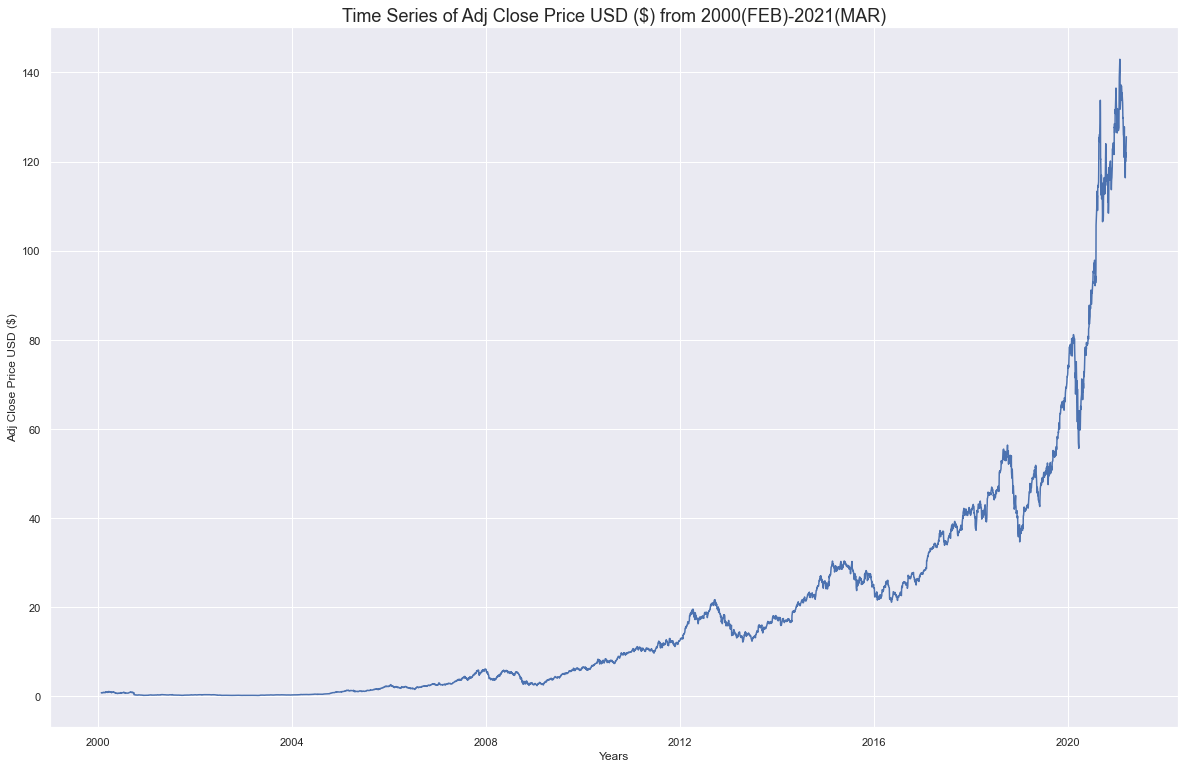

In [28]:
fig, ax = plt.subplots(figsize=(18,12))
ax.plot(CLOSETIME['Date'],CLOSETIME['Value'])
ax.set_ylabel('Close Price USD ($)')
ax.set_xlabel('Years')
ax.set_title('Time Series of Close Price USD ($) from 2000(FEB)-2021(MAR)', size=18);

### Time Series For SMAPrice

In [29]:
SMATIME = pd.concat([dates,SMANUM],axis = 1).reindex(dates.index)
SMATIME.columns = ['Date','Value']
SMATIME

,Date,Value
0,2000-01-27,0.8175
1,2000-01-28,0.8280
2,2000-01-31,0.8288
3,2000-02-01,0.8311
4,2000-02-02,0.8274
...,...,...
5312,2021-03-10,122.8620
5313,2021-03-11,122.6480
5314,2021-03-12,122.4290
5315,2021-03-15,122.1950


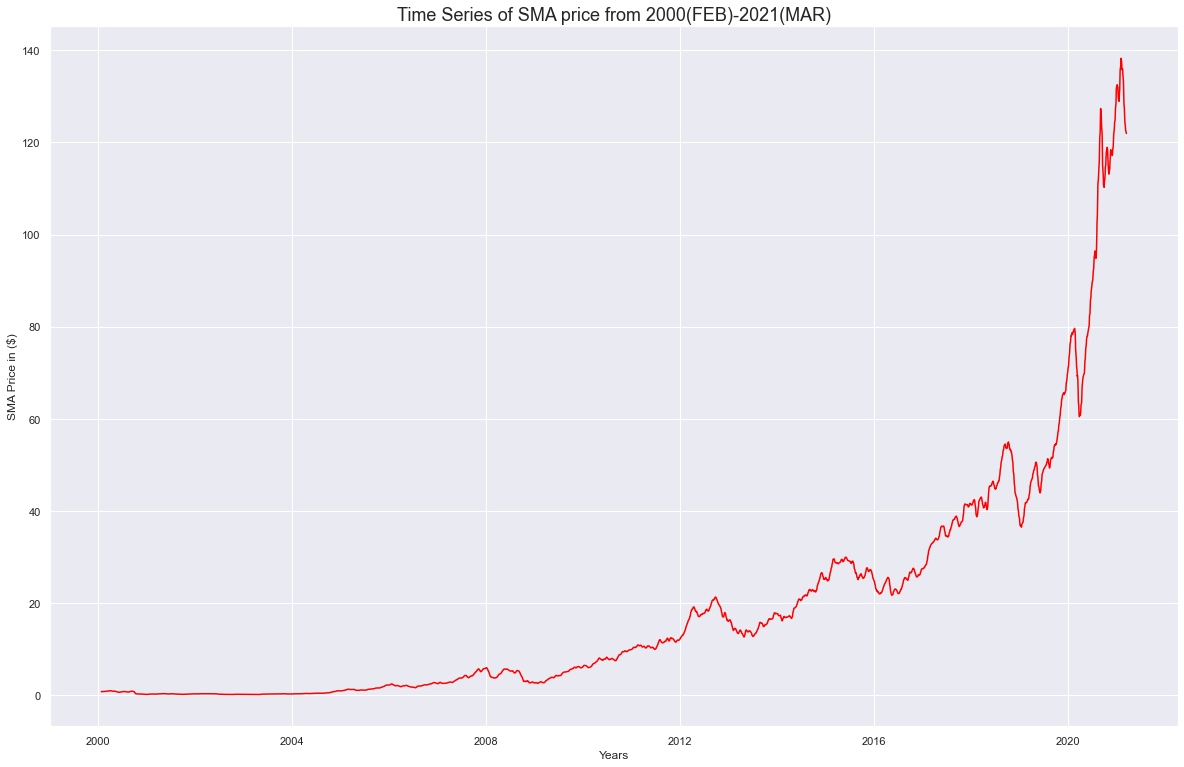

In [30]:
fig, ax = plt.subplots(figsize=(18,12))
ax.plot(SMATIME['Date'],SMATIME['Value'], color = 'red')
ax.set_ylabel('SMA Price in ($)')
ax.set_xlabel('Years')
ax.set_title('Time Series of SMA price from 2000(FEB)-2021(MAR)', size=18);

### Time Series For EMAPrice

In [31]:
EMATIME = pd.concat([dates,EMANUM],axis = 1).reindex(dates.index)
EMATIME.columns = ['Date','Value']
EMATIME

,Date,Value
0,2000-01-27,0.8221
1,2000-01-28,0.8239
2,2000-01-31,0.8153
3,2000-02-01,0.8125
4,2000-02-02,0.8056
...,...,...
5312,2021-03-10,123.0012
5313,2021-03-11,122.9174
5314,2021-03-12,122.4597
5315,2021-03-15,122.2688


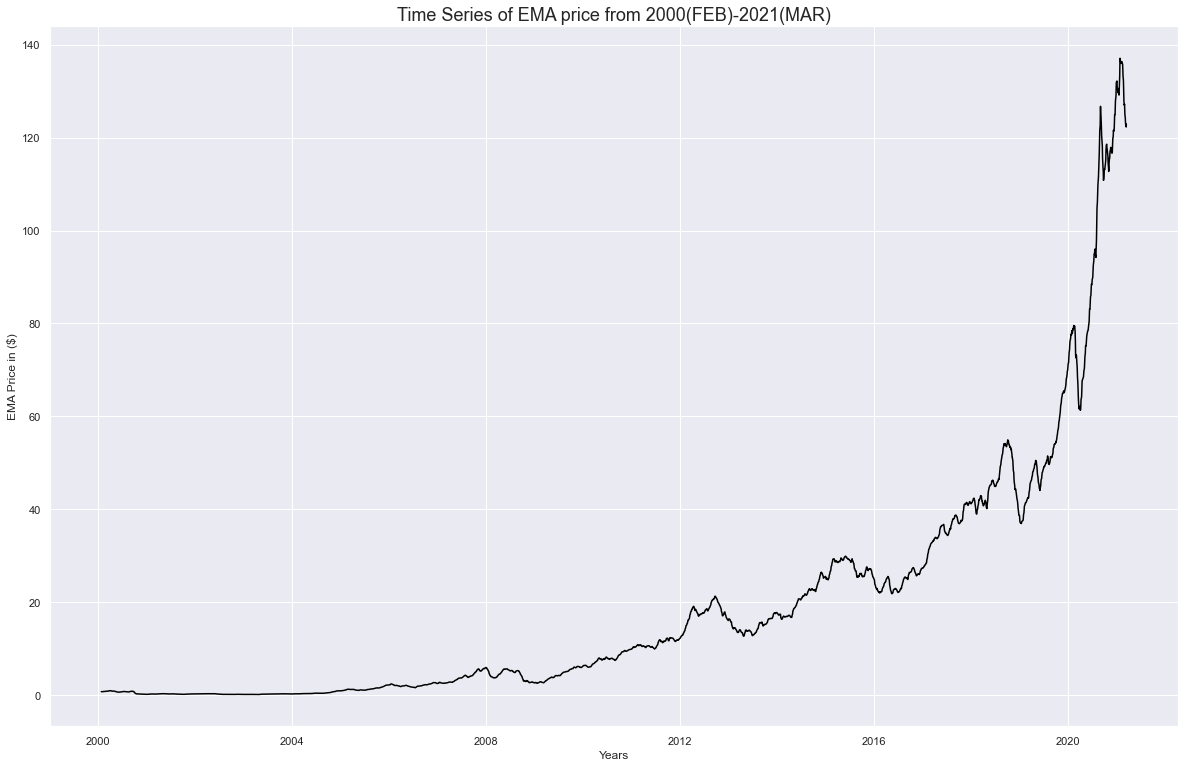

In [32]:
fig, ax = plt.subplots(figsize=(18,12))
ax.plot(EMATIME['Date'],EMATIME['Value'],color = 'Black')
ax.set_ylabel('EMA Price in ($)')
ax.set_xlabel('Years')
ax.set_title('Time Series of EMA price from 2000(FEB)-2021(MAR)', size=18);

### Time Series For WMAPrice

In [33]:
WMATIME = pd.concat([dates,WMANUM],axis = 1).reindex(dates.index)
WMATIME.columns = ['Date','Value']
WMATIME

,Date,Value
0,2000-01-27,0.8333
1,2000-01-28,0.8359
2,2000-01-31,0.8266
3,2000-02-01,0.8213
4,2000-02-02,0.8111
...,...,...
5312,2021-03-10,122.0322
5313,2021-03-11,121.9736
5314,2021-03-12,121.5649
5315,2021-03-15,121.3796


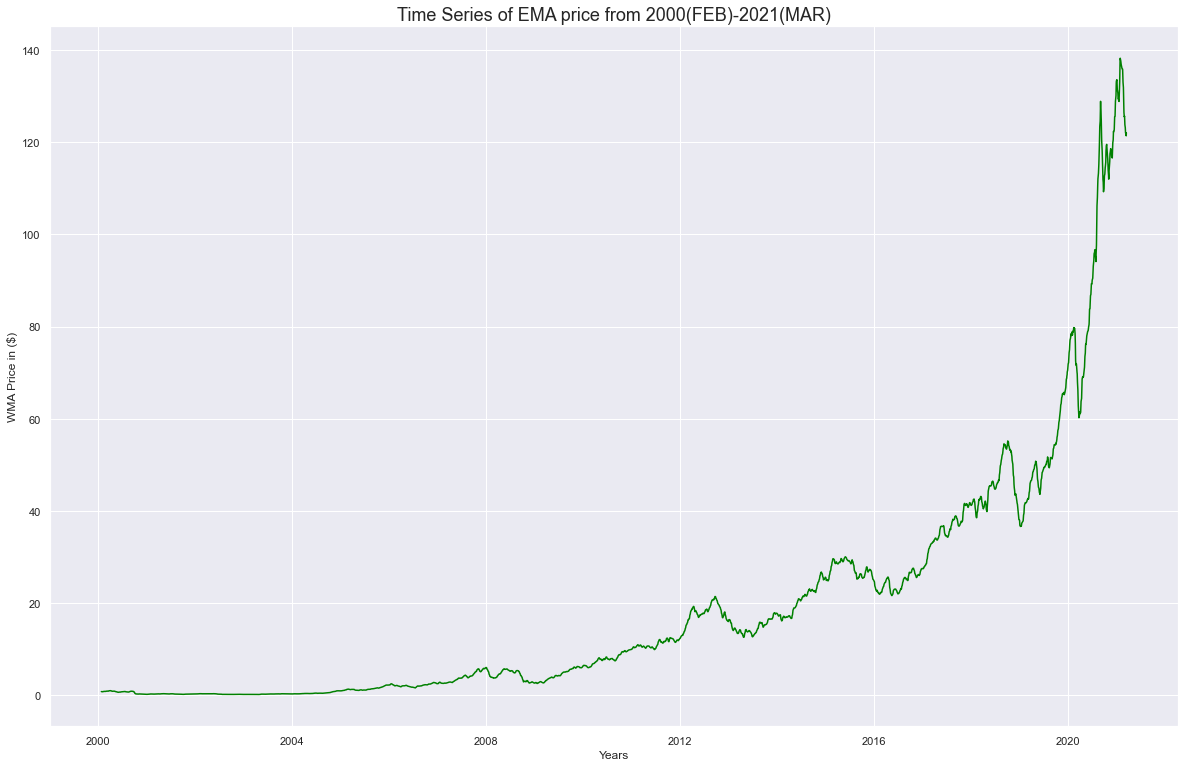

In [34]:
fig, ax = plt.subplots(figsize=(18,12))
ax.plot(WMATIME['Date'],WMATIME['Value'],color = 'Green')
ax.set_ylabel('WMA Price in ($)')
ax.set_xlabel('Years')
ax.set_title('Time Series of EMA price from 2000(FEB)-2021(MAR)', size=18);

### Time Series For All(Combined)

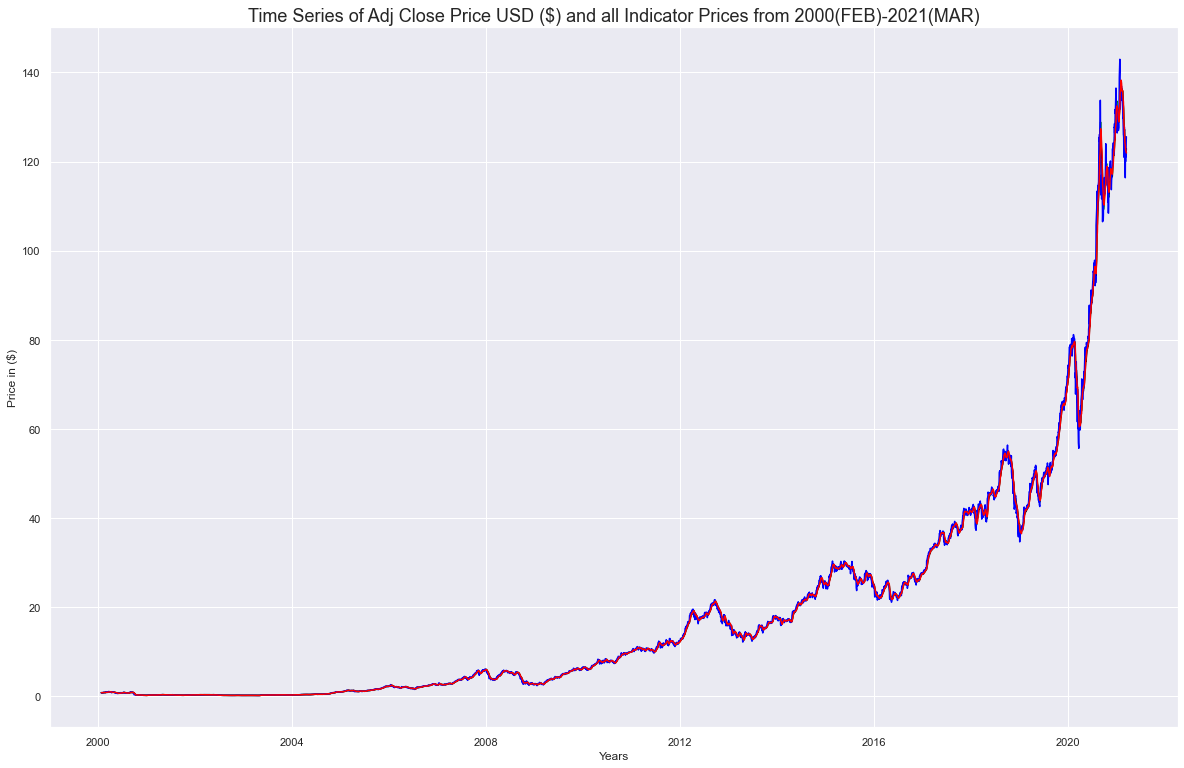

In [35]:
fig, ax = plt.subplots(figsize=(18,12))
ax.plot(WMATIME['Date'],WMATIME['Value'], color = 'Green')
ax.plot(EMATIME['Date'],EMATIME['Value'], color = 'Black')
ax.plot(CLOSETIME['Date'],CLOSETIME['Value'], color = 'Blue')
ax.plot(SMATIME['Date'],SMATIME['Value'], color = 'red')
ax.set_ylabel('Price in ($)')
ax.set_xlabel('Years')
ax.set_title('Time Series of Close Price USD ($) and all Indicator Prices from 2000(FEB)-2021(MAR)', size=18);

### LINEAR REGRESSION BETWEEN SMA AND CLOSEPRICE (70%Train)

Intercept of Regression 	: b =  [-0.0341155]
Coefficients of Regression 	: a =  [[1.00817388]]

  Predictors  Coefficients
0      Value      1.008174



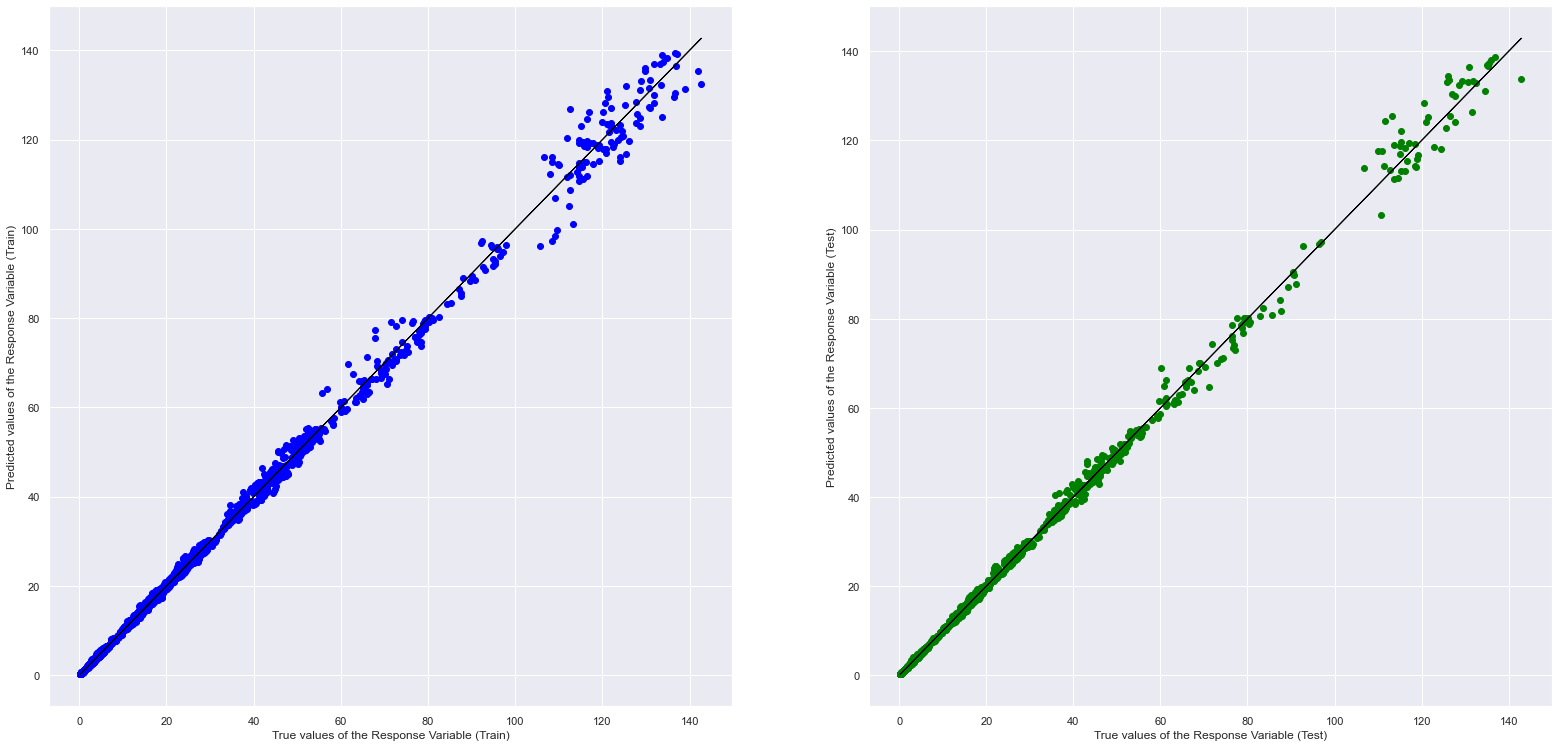

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9979043360416799
Mean Squared Error (MSE) 	: 1.3655330977455173
Root Mean Squared Error (RMSE) 	: 1.1685602670575093

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9980023024148271
Mean Squared Error (MSE) 	: 1.4211740929844665
Mean Squared Error (MSE) 	: 1.4211740929844665
Root Mean Squared Error (RMSE) 	: 1.1921300654645308



In [36]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SMANUM, CLOSENUM, train_size=0.70,test_size=0.30, random_state=40)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1,color = "black")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1,color = "black")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

### Polynomial Regression of the Above DataSet

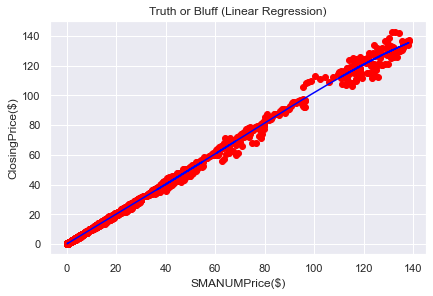

In [37]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(SMANUM)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, CLOSENUM)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(SMANUM, CLOSENUM, color='red')
    plt.plot(SMANUM, pol_reg.predict(poly_reg.fit_transform(SMANUM)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('SMANUMPrice($)')
    plt.ylabel('ClosingPrice($)')
    plt.show()
    return
viz_polymonial()

### LINEAR REGRESSION BETWEEN EMA AND CLOSEPRICE (70%Train)

Intercept of Regression 	: b =  [-0.04043628]
Coefficients of Regression 	: a =  [[1.00840411]]

  Predictors  Coefficients
0      Value      1.008404



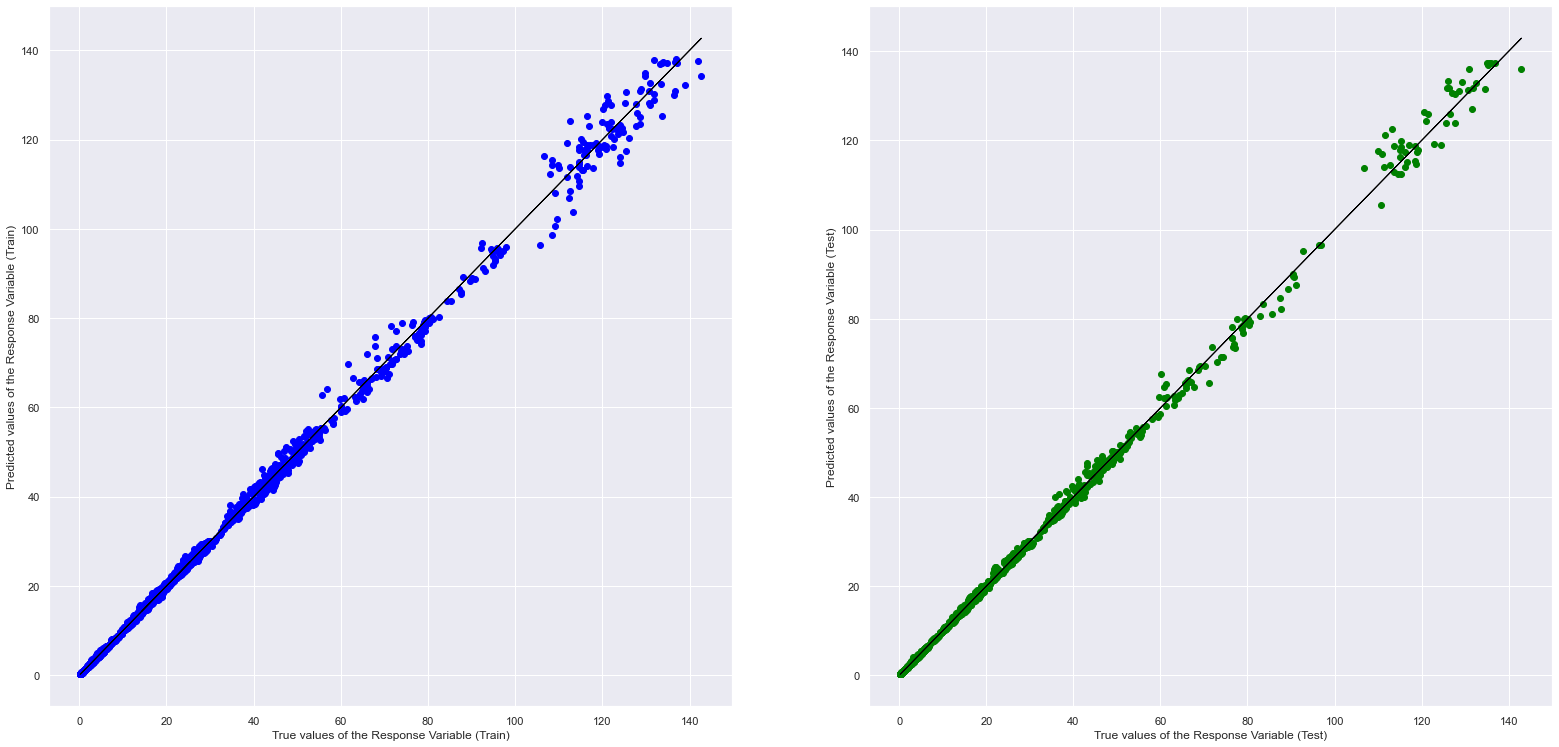

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.998367660407015
Mean Squared Error (MSE) 	: 1.0636312812137625
Root Mean Squared Error (RMSE) 	: 1.0313250124057705

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9985477131991183
Mean Squared Error (MSE) 	: 1.0331655763691967
Mean Squared Error (MSE) 	: 1.0331655763691967
Root Mean Squared Error (RMSE) 	: 1.0164475276024811



In [38]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(EMANUM, CLOSENUM, train_size=0.70,test_size=0.30, random_state=40)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1,color = "black")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1,color = "black")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

### Polynomial Regression of the Above DataSet

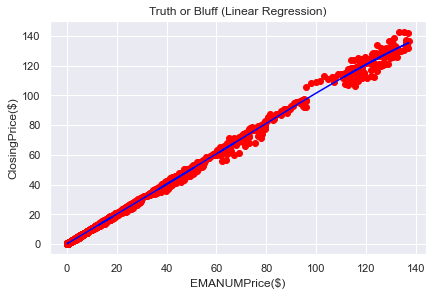

In [39]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(EMANUM)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, CLOSENUM)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(EMANUM, CLOSENUM, color='red')
    plt.plot(EMANUM, pol_reg.predict(poly_reg.fit_transform(EMANUM)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('EMANUMPrice($)')
    plt.ylabel('ClosingPrice($)')
    plt.show()
    return
viz_polymonial()

### LINEAR REGRESSION BETWEEN WMA AND CLOSEPRICE (70%Train)

Intercept of Regression 	: b =  [-0.02299164]
Coefficients of Regression 	: a =  [[1.00537392]]

  Predictors  Coefficients
0      Value      1.005374



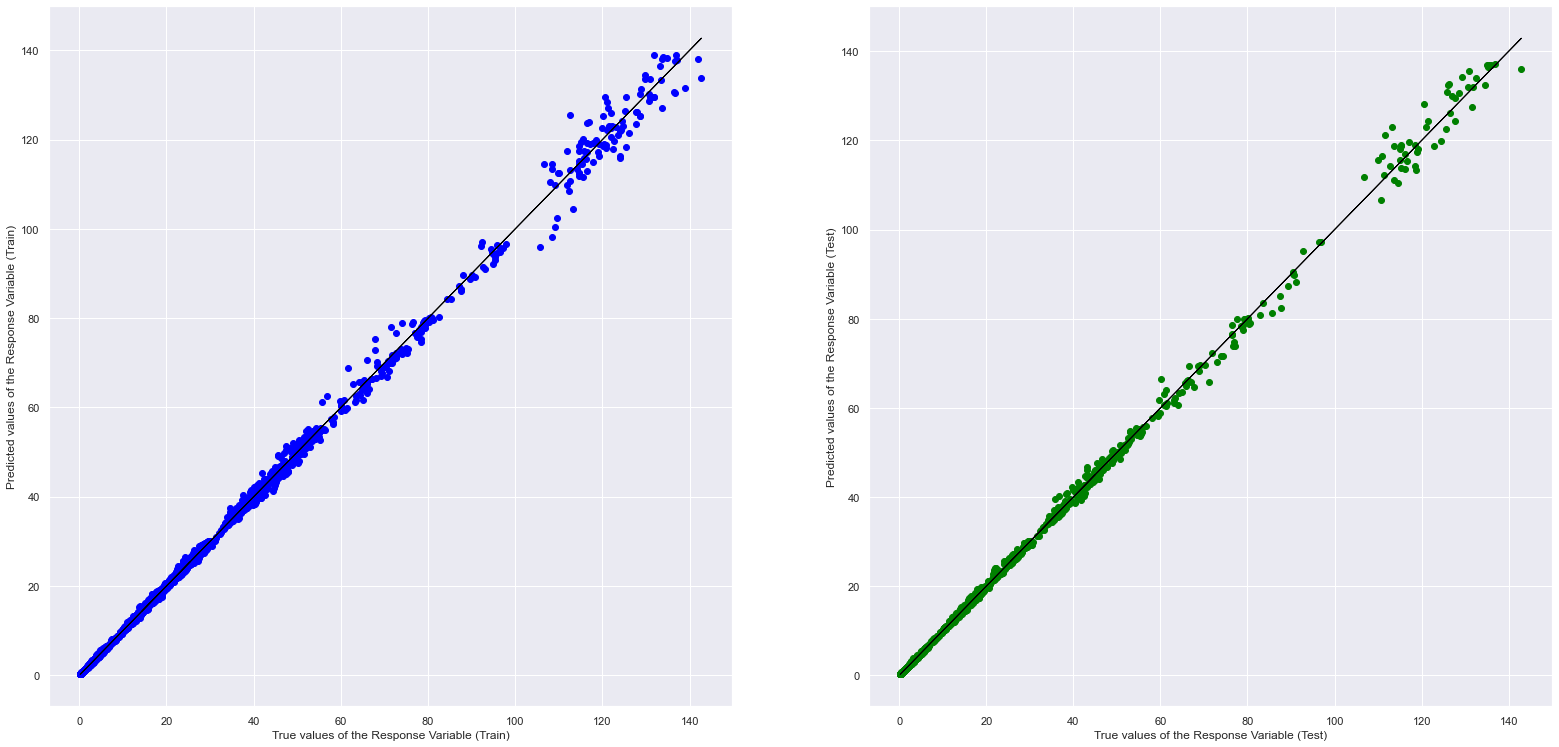

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9986109882136104
Mean Squared Error (MSE) 	: 0.9050790609550896
Root Mean Squared Error (RMSE) 	: 0.9513564321299823

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9987452395631737
Mean Squared Error (MSE) 	: 0.892644131401401
Mean Squared Error (MSE) 	: 0.892644131401401
Root Mean Squared Error (RMSE) 	: 0.9447984607319176



In [40]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(WMANUM, CLOSENUM, train_size=0.70,test_size=0.30, random_state=40)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1,color = "black")
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1,color = "black")
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

### Polynomial Regression of the Above DataSet

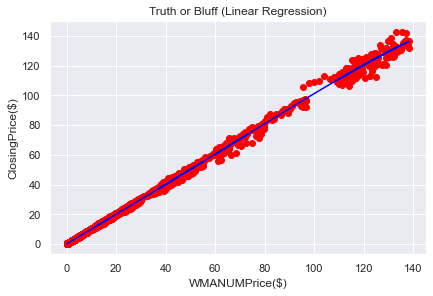

In [41]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(WMANUM)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, CLOSENUM)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(WMANUM, CLOSENUM, color='red')
    plt.plot(WMANUM, pol_reg.predict(poly_reg.fit_transform(WMANUM)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('WMANUMPrice($)')
    plt.ylabel('ClosingPrice($)')
    plt.show()
    return
viz_polymonial()

For all the 3 Technical indicators, it has a lower RMSE than the RMSE obtained when predicting Closing Price
using the pasily Daily values ie (Low,High,etc)

So, The 3 indicators are better measure for prediciting Closing Price
 
 
Based on Explained Variance on Train DataSet,

    The better indicator to predict the daily closeprice is: 
        WMA>EMA>SMA
    However all 3 values at at 0.9986 - 0.9979 which is relatively close values. Hence, difficult to determine

Based on Explained Variance on Test  DataSet,

    The better indicator to predict the daily closeprice is: 
        WMA>EMA>SMA
    However all 3 values are at 0.9987 - 0.9980 which is relatively close values. Hence, difficult to determine

Based on Mean Squared Error on Train DataSet,
    
    The better indicator to predict the daily closeprice is: 
        WMA<EMA<SMA
    Since WMA's MSE value is the lowest among the 3 it is the best model among the 3.
    

Based on Mean Squared Error on Test  DataSet,

    The better indicator to predict the daily closeprice is: 
        WMA<EMA<SMA
    Since WMA's MSE value is the lowest among the 3 it is the best model among the 3.

### HeatMap between WMA,SMA,EMA and ClosePrice 

In [42]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([closeprice['Value'], SMALIST['Value'],EMALIST['Value'],WMALIST['Value']],axis = 1).reindex(closeprice['Value'].index)
jointDF.columns = ['ClosePrice_Value','SMAPrice_Value', 'EMAPrice_Value','WMAPrice_Value']
jointDF["ClosePrice_Value"] = pd.to_numeric(jointDF["ClosePrice_Value"], downcast="float")
jointDF["SMAPrice_Value"] = pd.to_numeric(jointDF["SMAPrice_Value"], downcast="float")
jointDF["EMAPrice_Value"] = pd.to_numeric(jointDF["EMAPrice_Value"], downcast="float")
jointDF["WMAPrice_Value"] = pd.to_numeric(jointDF["WMAPrice_Value"], downcast="float")
jointDF.corr()

,ClosePrice_Value,SMAPrice_Value,EMAPrice_Value,WMAPrice_Value
ClosePrice_Value,1.000000,0.998970,0.999214,0.999328
SMAPrice_Value,0.998970,1.000000,0.999953,0.999918
EMAPrice_Value,0.999214,0.999953,1.000000,0.999957
WMAPrice_Value,0.999328,0.999918,0.999957,1.000000


<AxesSubplot:>

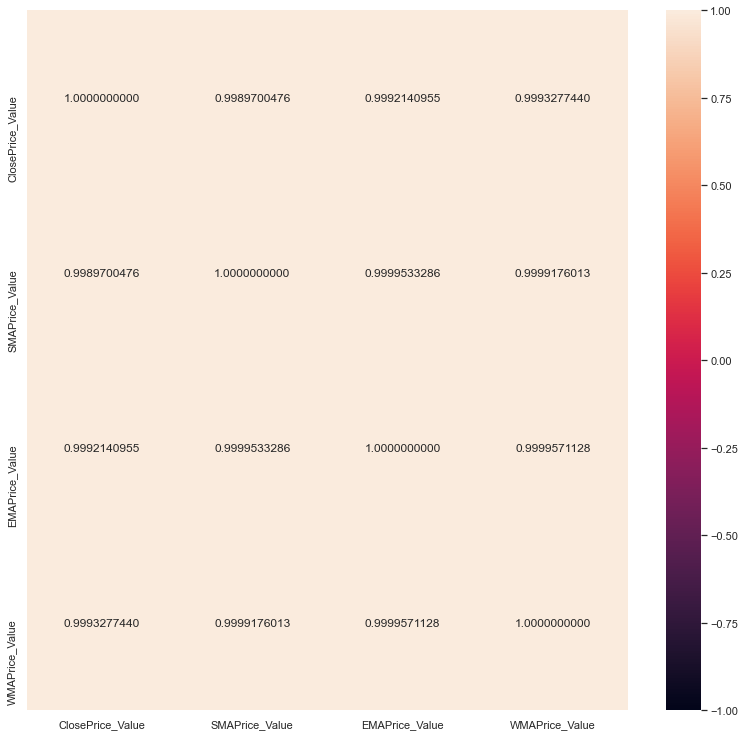

In [43]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".10f")

Based on the Correlation heatmap of the 3 indicators,

    The better indicator to predict the daily closeprice is: 
        WMA>EMA>SMA
    However all 3 values are at 0.9993 - 0.9989 which is relatively close values. Hence, difficult to determine

### Hence another way is needed to determine the best indicator among the 3. One that is unique to our problem and the Stock Exchange industry

### Self-made Algorithm to get the yearly profits (Using SMA as the technical indicator) based on a trading method from a trading stocks guidebook 


In [44]:
#initialisation of multiple Variables and Lists
sma_shares_list = []
total_sma_profit_list = []
temp_sma_profit_list = []
yearly_sma_profit_list = []
yearlyshare = []
smasharesbought_counter = 0
belowsma_counter = 0
abovesma_counter = 0
smaprofit = 0
smanumberofsharessold = 0
yearlysmasharesbought_counter=0;
year = 1

#In this for loop, the basic logic behind is that when the daily closing price of the stock is below the SMA indicator value for 3 consecutive days, we will purchase the stock using a fixed capital of
# $1000. When the daily closing price of the stock is above the SMA indicator value for 3 consecutive days, we will sell the 90% of the stocks held.

for i in range (0,5317,1):
    #if the daily closing price of the stock is below the SMA indicator value increment below SMA counter by 1
    if (float(closeprice.at[i,'Value'])<=float(SMALIST.at[i,'Value'])):
        belowsma_counter +=1
        abovesma_counter = 0
    #if the daily closing price of the stock is above the SMA indicator value increment above SMA counter by 1
    elif (float(closeprice.at[i,'Value'])>float(SMALIST.at[i,'Value'])):
        belowsma_counter = 0
        abovesma_counter +=1
    #if belowsma counter is 3, reset the counter and buy $1000 worth of shares based on that day's closing price
    if (belowsma_counter == 3):
        belowsma_counter = 0
        #keep track of how many times the shares are bought
        smasharesbought_counter +=1
        #Append the number of shares into a new list
        sma_shares_list.append(1000/float(closeprice.at[i,'Value']))
    #if abovesma counter is 3, reset the counter and buy $1000 worth of shares based on that day's closing price
    elif (abovesma_counter == 3):
        abovesma_counter = 0
        #90% of total shares bought will be sold
        smanumberofsharessold = sum(sma_shares_list)*0.90
        #total shares in the list
        total_smashares = sum(sma_shares_list)
        #Revenue that is collected after selling 90% of stocks based on the day's closing price
        smaprofit = smanumberofsharessold * float(closeprice.at[i,'Value'])
        #Clear the List and append the remaining 10% of the shares 
        sma_shares_list.clear()
        sma_shares_list.append(total_smashares - smanumberofsharessold)
        #SMA profit will be the total revenue collected subtracted by the number of times shares were bought* 900 since 90% of stocks is sold
        smaprofit= smaprofit - (smasharesbought_counter*900)
        #Totalsmaprofitlist is a list to record every single time profits were made
        total_sma_profit_list.append(smaprofit)
        #tempsmaprofitlist is a list to record every single time profits were made ( for calculation)
        temp_sma_profit_list.append(smaprofit)
        #Automatically append the sum of profits of that year into a yearly lists by detecting the changes in the year due to the function
        if(year!=year_checker(closeprice.at[i,'Description'])):
            yearly_sma_profit_list.append(sum(temp_sma_profit_list))
            #Clear the list to empty the profits of that year to include the next year
            temp_sma_profit_list.clear()
            #Increment the year
            year+=1
            yearlyshare.append(yearlysmasharesbought_counter*1000)
            yearlysmasharesbought_counter=0
        #Set the profit and number of shares bought to 0
        yearlysmasharesbought_counter += smasharesbought_counter
        smasharesbought_counter = 0
        smaprofit = 0
#to detect the last year as there is no change in year
yearly_sma_profit_list.append(sum(temp_sma_profit_list))
yearlyshare.append(yearlysmasharesbought_counter*1000)
yearlyshare.append(sum(yearlyshare))
temp_sma_profit_list.clear()
#Append the toal profits over 20 years
yearly_sma_profit_list.append(sum(yearly_sma_profit_list))
#Make into Dataframe
yearly_sma_profit_list = pd.DataFrame(yearly_sma_profit_list)
#Rename Dataframe rows for better visualisation
yearly_sma_profit_list.columns = ['SMA_Yearly']
yearly_sma_profit_list = yearly_sma_profit_list.rename(index={0: "2000", 1: "2001", 2: "2002", 3: "2003", 4: "2004", 5: "2005", 6: "2006", 7: "2007", 8: "2008", 9: "2009", 10: "2010", 11: "2011", 12: "2012", 13: "2013", 14: "2014", 15: "2015", 16: "2016", 17: "2017", 18: "2018", 19: "2019", 20: "2020", 21: "2021",22: "TOTAL"})
yearlyshare = pd.DataFrame(yearlyshare)
yearlyshare.columns = ['Cost']
yearlyshare = yearlyshare.rename(index={0: "2000", 1: "2001", 2: "2002", 3: "2003", 4: "2004", 5: "2005", 6: "2006", 7: "2007", 8: "2008", 9: "2009", 10: "2010", 11: "2011", 12: "2012", 13: "2013", 14: "2014", 15: "2015", 16: "2016", 17: "2017", 18: "2018", 19: "2019", 20: "2020", 21: "2021",22: "TOTAL"})
yearly_sma_profit_list

,SMA_Yearly
2000,2829.888241
2001,4126.291929
2002,3460.544134
2003,5164.312634
2004,2721.673103
2005,3455.722876
2006,3650.654680
2007,2707.952813
2008,3403.623298
2009,3639.646991


### Consolidate total cost per year and profit margin  (SMA)

In [45]:
percentprofit = []
#Calculate Profit margin
for i in range(23):
    profitvalue = yearly_sma_profit_list.iloc[i]['SMA_Yearly']
    cost = yearlyshare.iloc[i]['Cost']
    temp = (profitvalue/cost)*100
    percentprofit.append(temp)
#Convert to Dtaframe and clean the table to get better visualisation
percentprofit = pd.DataFrame(percentprofit)
percentprofit.columns = ['SMAProfitMargin_%']
percentprofit = percentprofit.rename(index={0: "2000", 1: "2001", 2: "2002", 3: "2003", 4: "2004", 5: "2005", 6: "2006", 7: "2007", 8: "2008", 9: "2009", 10: "2010", 11: "2011", 12: "2012", 13: "2013", 14: "2014", 15: "2015", 16: "2016", 17: "2017", 18: "2018", 19: "2019", 20: "2020", 21: "2021",22: "TOTAL"})
# Consolidate total cost per year and profit margin 
SMAoverview= pd.concat([yearly_sma_profit_list, yearlyshare,percentprofit],axis = 1)
SMAoverview

,SMA_Yearly,Cost,SMAProfitMargin_%
2000,2829.888241,39000,7.256124
2001,4126.291929,30000,13.754306
2002,3460.544134,31000,11.163046
2003,5164.312634,38000,13.590296
2004,2721.673103,18000,15.120406
2005,3455.722876,24000,14.398845
2006,3650.654680,33000,11.062590
2007,2707.952813,24000,11.283137
2008,3403.623298,40000,8.509058
2009,3639.646991,23000,15.824552


### Self-made Algorithm to get the yearly profits (Using EMA as the technical indicator) based on a trading method from a trading stocks guidebook 

In [46]:
#initialisation of multiple Variables and Lists
ema_shares_list = []
total_ema_profit_list = []
temp_ema_profit_list = []
yearly_ema_profit_list = []
yearlyshare=[]
emasharesbought_counter = 0
belowema_counter = 0
aboveema_counter = 0
emaprofit = 0
emanumberofsharessold = 0
yearlyemasharesbought_counter=0;
year = 1

#In this for loop, the basic logic behind is that when the daily closing price of the stock is below the EMA indicator value for 3 consecutive days, we will purchase the stock using a fixed capital of
# $1000. When the daily closing price of the stock is aboive the EMA indicator value for 3 consecutive days, we will sell the 90% of the stocks held.

for i in range (0,5317,1):
    #if the daily closing price of the stock is below the EMA indicator value increment below EMA counter by 1
    if (float(closeprice.at[i,'Value'])<=float(EMALIST.at[i,'Value'])):
        belowema_counter +=1
        aboveema_counter = 0
    #if the daily closing price of the stock is above the EMA indicator value increment above EMA counter by 1
    elif (float(closeprice.at[i,'Value'])>float(EMALIST.at[i,'Value'])):
        belowema_counter = 0
        aboveema_counter +=1
    #if belowema counter is 3, reset the counter and buy $1000 worth of shares based on that day's closing price
    if (belowema_counter == 3):
        belowema_counter = 0
        #keep track of how many times the shares are bought
        emasharesbought_counter +=1
        #Append the number of shares into a new list
        ema_shares_list.append(1000/float(closeprice.at[i,'Value']))
    #if aboveema counter is 3, reset the counter and buy $1000 worth of shares based on that day's closing price
    elif (aboveema_counter == 3):
        aboveema_counter = 0
        #90% of total shares bought will be sold
        emanumberofsharessold = sum(ema_shares_list) * 0.90
        #total shares in the list
        total_emashares = sum(ema_shares_list)
        #Revenue that is collected after selling 90% of stocks based on the day's closing price
        emaprofit = emanumberofsharessold * float(closeprice.at[i,'Value'])
        #Clear the List and append the remaining 10% of the shares 
        ema_shares_list.clear()
        ema_shares_list.append(total_emashares - emanumberofsharessold)
        #EMA profit will be the total revenue collected subtracted by the number of times shares were bought* 900 since 90% of stocks is sold
        emaprofit= emaprofit - (emasharesbought_counter*900)
        #Totalemaprofitlist is a list to record every single time profits were made
        total_ema_profit_list.append(emaprofit)
        #tempsmaprofitlist is a list to record every single time profits were made ( for calculation)
        temp_ema_profit_list.append(emaprofit)
        #Automatically append the sum of profits of that year into a yearly lists by detecting the changes in the year due to the function
        if(year!=year_checker(closeprice.at[i,'Description'])):
            yearly_ema_profit_list.append(sum(temp_ema_profit_list))
            #Clear the list to empty the profits of that year to include the next year
            temp_ema_profit_list.clear()
            #increment the year by 1
            year+=1
            yearlyshare.append(yearlyemasharesbought_counter*1000)
            yearlyemasharesbought_counter=0
        #Set the profit and number of shares bought to 0
        yearlyemasharesbought_counter += emasharesbought_counter
        emasharesbought_counter = 0
        emaprofit = 0
#to detect the last year as there is no change in year
yearly_ema_profit_list.append(sum(temp_ema_profit_list))
yearlyshare.append(yearlyemasharesbought_counter*1000)
yearlyshare.append(sum(yearlyshare))
temp_ema_profit_list.clear()
#Append the toal profits over 20 years
yearly_ema_profit_list.append(sum(yearly_ema_profit_list))
#Make into Dataframe
yearly_ema_profit_list = pd.DataFrame(yearly_ema_profit_list)
#Rename Dataframe rows for better visualisation
yearly_ema_profit_list.columns = ['EMA_Yearly']
yearly_ema_profit_list = yearly_ema_profit_list.rename(index={22: "TOTAL"})
yearly_ema_profit_list = yearly_ema_profit_list.rename(index={0: "2000", 1: "2001", 2: "2002", 3: "2003", 4: "2004", 5: "2005", 6: "2006", 7: "2007", 8: "2008", 9: "2009", 10: "2010", 11: "2011", 12: "2012", 13: "2013", 14: "2014", 15: "2015", 16: "2016", 17: "2017", 18: "2018", 19: "2019", 20: "2020", 21: "2021",22: "TOTAL"})
yearlyshare = pd.DataFrame(yearlyshare)
yearlyshare.columns = ['Cost']
yearlyshare = yearlyshare.rename(index={0: "2000", 1: "2001", 2: "2002", 3: "2003", 4: "2004", 5: "2005", 6: "2006", 7: "2007", 8: "2008", 9: "2009", 10: "2010", 11: "2011", 12: "2012", 13: "2013", 14: "2014", 15: "2015", 16: "2016", 17: "2017", 18: "2018", 19: "2019", 20: "2020", 21: "2021",22: "TOTAL"})
yearly_ema_profit_list

,EMA_Yearly
2000,3039.294715
2001,3097.085478
2002,3061.593554
2003,4467.270531
2004,2486.260845
2005,3030.523981
2006,3572.428411
2007,2330.424620
2008,3930.389999
2009,2846.157302


### Consolidate total cost per year and profit margin  (EMA)

In [47]:
percentprofit = []
#Calculate Profit margin
for i in range(23):
    profitvalue = yearly_ema_profit_list.iloc[i]['EMA_Yearly']
    cost = yearlyshare.iloc[i]['Cost']
    temp = (profitvalue/cost)*100
    percentprofit.append(temp)
#Convert to Dtaframe and clean the table to get better visualisation
percentprofit = pd.DataFrame(percentprofit)
percentprofit.columns = ['EMAProfitMargin_%']
percentprofit = percentprofit.rename(index={0: "2000", 1: "2001", 2: "2002", 3: "2003", 4: "2004", 5: "2005", 6: "2006", 7: "2007", 8: "2008", 9: "2009", 10: "2010", 11: "2011", 12: "2012", 13: "2013", 14: "2014", 15: "2015", 16: "2016", 17: "2017", 18: "2018", 19: "2019", 20: "2020", 21: "2021",22: "TOTAL"})
# Consolidate total cost per year and profit margin
EMAoverview= pd.concat([yearly_ema_profit_list, yearlyshare,percentprofit],axis = 1)
EMAoverview

,EMA_Yearly,Cost,EMAProfitMargin_%
2000,3039.294715,39000,7.793063
2001,3097.085478,30000,10.323618
2002,3061.593554,28000,10.934263
2003,4467.270531,34000,13.139031
2004,2486.260845,15000,16.575072
2005,3030.523981,22000,13.775109
2006,3572.428411,32000,11.163839
2007,2330.424620,24000,9.710103
2008,3930.389999,40000,9.825975
2009,2846.157302,19000,14.979775


### Self-made Algorithm to get the yearly profits (Using WMA as the technical indicator) based on a trading method from a trading stocks guidebook 

In [48]:
#initialisation of multiple Variables and Lists
wma_shares_list = []
total_wma_profit_list = []
temp_wma_profit_list = []
yearly_wma_profit_list = []
yearlyshare = []
wmasharesbought_counter = 0
belowwma_counter = 0
abovewma_counter = 0
wmaprofit = 0
wmanumberofsharessold = 0
yearlywmasharesbought_counter=0;
year = 1

#In this for loop, the basic logic behind is that when the daily closing price of the stock is below the SMA indicator value for 3 consecutive days, we will purchase the stock using a fixed capital of
# $1000. When the daily closing price of the stock is above the SMA indicator value for 3 consecutive days, we will sell the 90% of the stocks held.

for i in range (0,5317,1):
    #if the daily closing price of the stock is below the SMA indicator value increment below SMA counter by 1
    if (float(closeprice.at[i,'Value'])<=float(WMALIST.at[i,'Value'])):
        belowwma_counter +=1
        abovewma_counter = 0
    #if the daily closing price of the stock is above the SMA indicator value increment above SMA counter by 1
    elif (float(closeprice.at[i,'Value'])>float(WMALIST.at[i,'Value'])):
        belowwma_counter = 0
        abovewma_counter +=1
    #if belowsma counter is 3, reset the counter and buy $1000 worth of shares based on that day's closing price
    if (belowwma_counter == 3):
        belowwma_counter = 0
        #keep track of how many times the shares are bought
        wmasharesbought_counter +=1
        #Append the number of shares into a new list
        wma_shares_list.append(1000/float(closeprice.at[i,'Value']))
    #if abovesma counter is 3, reset the counter and buy $1000 worth of shares based on that day's closing price
    elif (abovewma_counter == 3):
        abovewma_counter = 0
        #90% of total shares bought will be sold
        wmanumberofsharessold = sum(wma_shares_list)*0.90
        #total shares in the list
        total_wmashares = sum(wma_shares_list)
        #Revenue that is collected after selling 90% of stocks based on the day's closing price
        wmaprofit = wmanumberofsharessold * float(closeprice.at[i,'Value'])
        #Clear the List and append the remaining 10% of the shares 
        wma_shares_list.clear()
        wma_shares_list.append(total_wmashares - wmanumberofsharessold)
        #SMA profit will be the total revenue collected subtracted by the number of times shares were bought* 900 since 90% of stocks is sold
        wmaprofit= wmaprofit - (wmasharesbought_counter*900)
        #Totalsmaprofitlist is a list to record every single time profits were made
        total_wma_profit_list.append(wmaprofit)
        #tempsmaprofitlist is a list to record every single time profits were made ( for calculation)
        temp_wma_profit_list.append(wmaprofit)
        #Automatically append the sum of profits of that year into a yearly lists by detecting the changes in the year due to the function
        if(year!=year_checker(closeprice.at[i,'Description'])):
            yearly_wma_profit_list.append(sum(temp_wma_profit_list))
            #Clear the list to empty the profits of that year to include the next year
            temp_wma_profit_list.clear()
            #Increment the year
            year+=1
            yearlyshare.append(yearlywmasharesbought_counter*1000)
            yearlywmasharesbought_counter=0
        #Set the profit and number of shares bought to 0
        yearlywmasharesbought_counter += wmasharesbought_counter
        wmasharesbought_counter = 0
        wmaprofit = 0
#to detect the last year as there is no change in year
yearly_wma_profit_list.append(sum(temp_wma_profit_list))
yearlyshare.append(yearlywmasharesbought_counter*1000)
yearlyshare.append(sum(yearlyshare))
temp_wma_profit_list.clear()
#Append the toal profits over 20 years
yearly_wma_profit_list.append(sum(yearly_wma_profit_list))
#Make into Dataframe
yearly_wma_profit_list = pd.DataFrame(yearly_wma_profit_list)
#Rename Dataframe rows for better visualisation
yearly_wma_profit_list.columns = ['WMA_Yearly']
yearly_wma_profit_list = yearly_wma_profit_list.rename(index={0: "2000", 1: "2001", 2: "2002", 3: "2003", 4: "2004", 5: "2005", 6: "2006", 7: "2007", 8: "2008", 9: "2009", 10: "2010", 11: "2011", 12: "2012", 13: "2013", 14: "2014", 15: "2015", 16: "2016", 17: "2017", 18: "2018", 19: "2019", 20: "2020", 21: "2021",22: "TOTAL"})
yearlyshare = pd.DataFrame(yearlyshare)
yearlyshare.columns = ['Cost']
yearlyshare = yearlyshare.rename(index={0: "2000", 1: "2001", 2: "2002", 3: "2003", 4: "2004", 5: "2005", 6: "2006", 7: "2007", 8: "2008", 9: "2009", 10: "2010", 11: "2011", 12: "2012", 13: "2013", 14: "2014", 15: "2015", 16: "2016", 17: "2017", 18: "2018", 19: "2019", 20: "2020", 21: "2021",22: "TOTAL"})
yearly_wma_profit_list

,WMA_Yearly
2000,2695.167721
2001,3757.350010
2002,3300.274786
2003,3528.336535
2004,2489.713201
2005,3129.085925
2006,3418.487316
2007,2811.242883
2008,2683.445123
2009,3213.387883


### Consolidate total cost per year and profit margin  (WMA)

In [49]:
percentprofit = []
#Calculate Profit margin
for i in range(23):
    profitvalue = yearly_wma_profit_list.iloc[i]['WMA_Yearly']
    cost = yearlyshare.iloc[i]['Cost']
    temp = (profitvalue/cost)*100
    percentprofit.append(temp)
#Convert to Dtaframe and clean the table to get better visualisation
percentprofit = pd.DataFrame(percentprofit)
percentprofit.columns = ['WMAProfitMargin_%']
percentprofit = percentprofit.rename(index={0: "2000", 1: "2001", 2: "2002", 3: "2003", 4: "2004", 5: "2005", 6: "2006", 7: "2007", 8: "2008", 9: "2009", 10: "2010", 11: "2011", 12: "2012", 13: "2013", 14: "2014", 15: "2015", 16: "2016", 17: "2017", 18: "2018", 19: "2019", 20: "2020", 21: "2021",22: "TOTAL"})
# Consolidate total cost per year and profit margin
WMAoverview= pd.concat([yearly_wma_profit_list, yearlyshare,percentprofit],axis = 1)
WMAoverview

,WMA_Yearly,Cost,WMAProfitMargin_%
2000,2695.167721,35000,7.700479
2001,3757.350010,28000,13.419107
2002,3300.274786,31000,10.646048
2003,3528.336535,29000,12.166678
2004,2489.713201,18000,13.831740
2005,3129.085925,23000,13.604721
2006,3418.487316,30000,11.394958
2007,2811.242883,28000,10.040153
2008,2683.445123,37000,7.252554
2009,3213.387883,21000,15.301847


### Compare SMA,WMA and EMA Profit Margins

In [50]:
comparesmaemawmapcnt= pd.concat([SMAoverview['SMAProfitMargin_%'],EMAoverview['EMAProfitMargin_%'],WMAoverview['WMAProfitMargin_%']],axis = 1)
comparesmaemawmapcnt

,SMAProfitMargin_%,EMAProfitMargin_%,WMAProfitMargin_%
2000,7.256124,7.793063,7.700479
2001,13.754306,10.323618,13.419107
2002,11.163046,10.934263,10.646048
2003,13.590296,13.139031,12.166678
2004,15.120406,16.575072,13.831740
2005,14.398845,13.775109,13.604721
2006,11.062590,11.163839,11.394958
2007,11.283137,9.710103,10.040153
2008,8.509058,9.825975,7.252554
2009,15.824552,14.979775,15.301847


### Observe how many years which each indicator is above the other (Realise that the number of times does not equate into revealing the actual data values into showing which is a better technical indicator)

In [51]:
# Determining which MA has more profit margin based on a YOY comparison.

smaabove = 0
wmaabove = 0
emaabove = 0
for i in range(22):
    smavalue = comparesmaemawmapcnt.iloc[i]['SMAProfitMargin_%']
    emavalue = comparesmaemawmapcnt.iloc[i]['EMAProfitMargin_%']
    wmavalue = comparesmaemawmapcnt.iloc[i]['WMAProfitMargin_%']
    if smavalue > emavalue and smavalue > wmavalue :
        smaabove+=1
    if emavalue > smavalue and emavalue > wmavalue :
        emaabove+=1
    if wmavalue > emavalue and wmavalue > smavalue :
        wmaabove+=1
    
print("SMA yearly profit margin is above EMA yearly profit margin and WMA yearly profit margin {} times from 2000 to 2021".format(smaabove))
print("EMA yearly profit margin is above SMA yearly profit margin and WMA yearly profit margin {} times from 2000 to 2021".format(emaabove))
print("WMA yearly profit margin is above SMA yearly profit margin and EMA yearly profit margin {} times from 2000 to 2021".format(wmaabove))

SMA yearly profit margin is above EMA yearly profit margin and WMA yearly profit margin 9 times from 2000 to 2021
EMA yearly profit margin is above SMA yearly profit margin and WMA yearly profit margin 7 times from 2000 to 2021
WMA yearly profit margin is above SMA yearly profit margin and EMA yearly profit margin 6 times from 2000 to 2021


### Visualizing the yearly profits of each techincal indicator

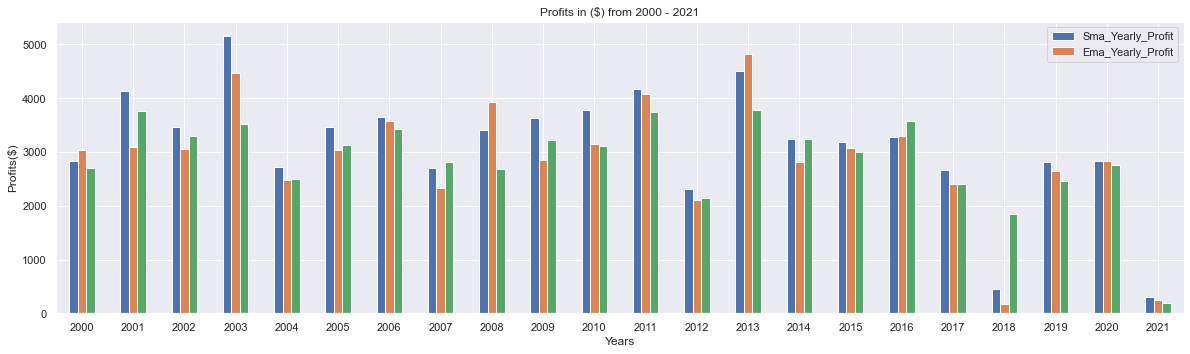

In [52]:
#Visualizing the yearly profits of each MA
comparesmaemawma= pd.concat([SMAoverview['SMA_Yearly'],EMAoverview['EMA_Yearly'],WMAoverview['WMA_Yearly']],axis = 1)
Overview = comparesmaemawma.iloc[0:22].plot.bar(rot=0,figsize=(18,5))
plt.legend(['Sma_Yearly_Profit', 'Ema_Yearly_Profit'])
plt.title('Profits in ($) from 2000 - 2021')
plt.xlabel('Years')
plt.ylabel('Profits($)')
plt.show()

### Visualizing the Total profits of each technical indicator

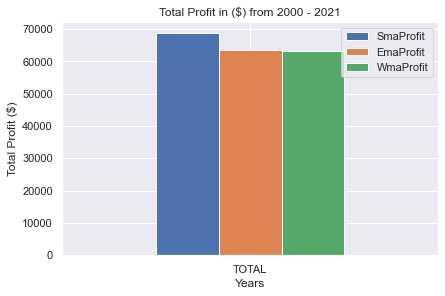

In [53]:
#Visualizing the total profit of each MA

Final =comparesmaemawma.iloc[22:23].plot.bar(rot=0)
plt.legend(['SmaProfit', 'EmaProfit','WmaProfit'])
plt.title('Total Profit in ($) from 2000 - 2021')
plt.xlabel('Years')
plt.ylabel('Total Profit ($)')
plt.show()

### Visualizing the yearly profit margins of each technical indicator

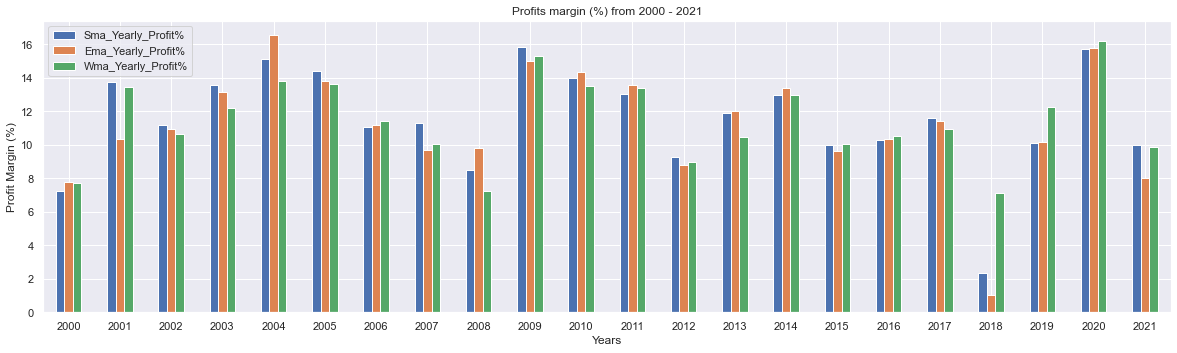

In [54]:
### Visualizing the yearly profit margins of each technical indicator
Overview = comparesmaemawmapcnt.iloc[0:22].plot.bar(rot=0,figsize=(18,5))
plt.legend(['Sma_Yearly_Profit%', 'Ema_Yearly_Profit%','Wma_Yearly_Profit%'])
plt.title('Profits margin (%) from 2000 - 2021')
plt.xlabel('Years')
plt.ylabel('Profit Margin (%)')
plt.show()

### Visualizing the Total profit margins of each technical indicator

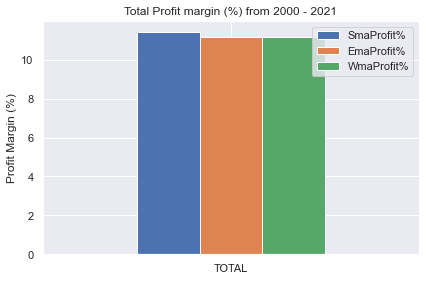

In [55]:
### Visualizing the Total profit margins of each technical indicator

Final =comparesmaemawmapcnt.iloc[22:23].plot.bar(rot=0)
plt.legend(['SmaProfit%', 'EmaProfit%','WmaProfit%'])
plt.title('Total Profit margin (%) from 2000 - 2021')
plt.ylabel('Profit Margin (%)')
plt.show()

### SMA is the best technical indicator to help you make money -

Conclusion:
    
    For all the 3 Technical indicators, it has a lower RMSE than the RMSE obtained when predicting Closing Price
    using the past Daily values ie (Low,High,etc)

    So, The 3 indicators are better measure for predicitng Closing Price
    
    And Among the 3 indicators, since using SMA as an indicator will reap us the most profits, 
    SMA is the best indicator among all the rest according to our algorithm
 
 
    